In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats 
#Open File 
file = open(input())
header = None
data = []

#Reading the file
for line in file:
    if header is None:    #Capturing the header
        header = line.strip().split(",")  #Split the header by commas
    else:
        row = line.strip().split(",")     #Split data rows by commas
        data.append(row)

data_dict = {}
for col in header:
    data_dict[col] = []
#We add the values to the dictionary
for row in data:
    for i, value in enumerate(row):  #Enumerate to get index for matching header
        col = header[i]  #Match column name using the index
        if value.replace('.', '', 1).isdigit():  #Checking if the value is a number
            data_dict[col].append(float(value))  #Converting numeric values to float
        else:
            data_dict[col].append(value)        #We keep the dictionaries as string as well 
# Calculating statistics
num_columns = ['Days with AQI', 'Good Days', 'Moderate Days', 'Unhealthy Days', 
    'Unhealthy for Sensitive Groups Days', 'Very Unhealthy Days', 'Hazardous Days', 
    'Max AQI', '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']

#We use a for loop to calculate the statistical values 
for col in num_columns:
    values = data_dict[col]  #Accesses the column data from the dictionary
    values = np.array(values)  #Converts the list to a NumPy array
    mean = np.mean(values)  #Calculating the mean
    median = np.median(values)  #Calculating the median
    std_d = np.std(values)  #Calculating the standard deviation 
    print(f"\nColumn:", col) #Print the results
    print("Mean:", mean)
    print("Median:", median)
    print("Standard Deviation:", std_d)

 Air_Quality_Index_Final_Project.csv



Column: Days with AQI
Mean: 124.11664899257688
Median: 121.0
Standard Deviation: 51.24783489838189

Column: Good Days
Mean: 97.33404029692471
Median: 91.0
Standard Deviation: 42.284370049511914

Column: Moderate Days
Mean: 26.153764581124072
Median: 18.0
Standard Deviation: 25.082783492178887

Column: Unhealthy Days
Mean: 0.06256627783669141
Median: 0.0
Standard Deviation: 0.5223616629319116

Column: Unhealthy for Sensitive Groups Days
Mean: 0.5440084835630965
Median: 0.0
Standard Deviation: 1.9495012952122073

Column: Very Unhealthy Days
Mean: 0.007423117709437964
Median: 0.0
Standard Deviation: 0.09741101481370024

Column: Hazardous Days
Mean: 0.014846235418875928
Median: 0.0
Standard Deviation: 0.21549753206159983

Column: Max AQI
Mean: 87.40721102863202
Median: 78.0
Standard Deviation: 65.91406107554627

Column: 90th Percentile AQI
Mean: 54.374337221633084
Median: 54.0
Standard Deviation: 12.682803671593186

Column: Median AQI
Mean: 37.57476139978791
Median: 39.0
Standard Deviatio

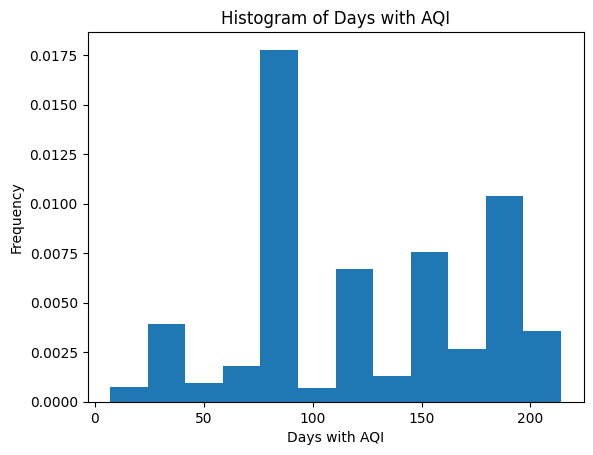

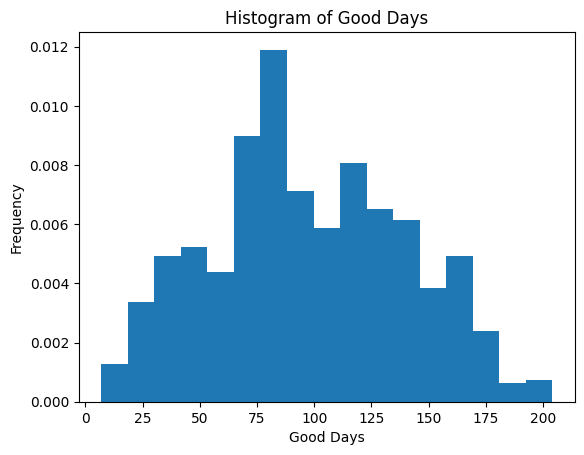

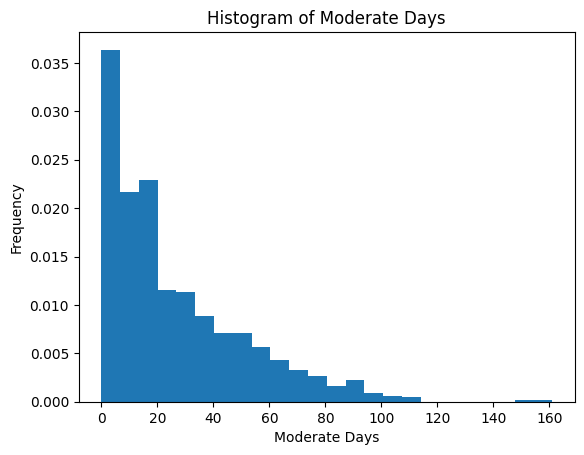

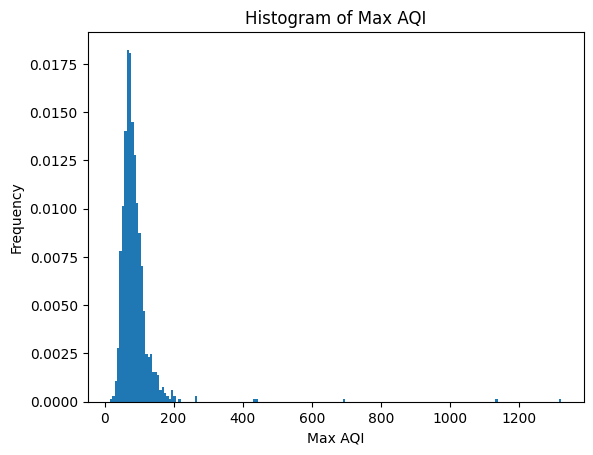

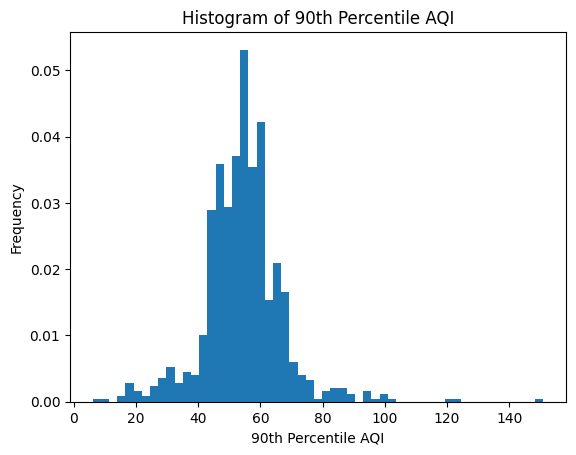

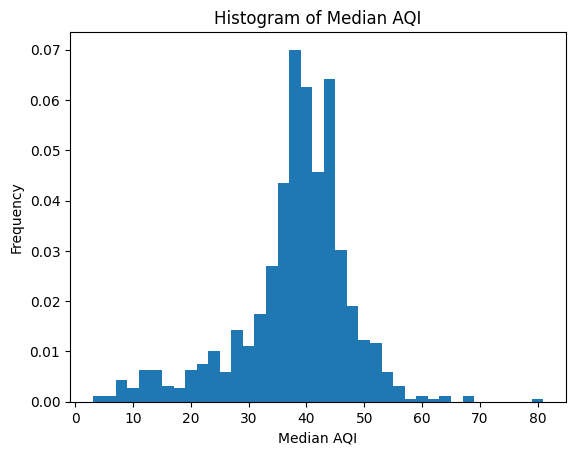

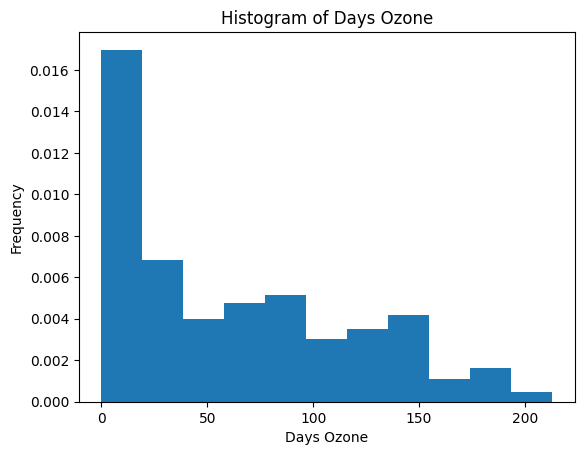

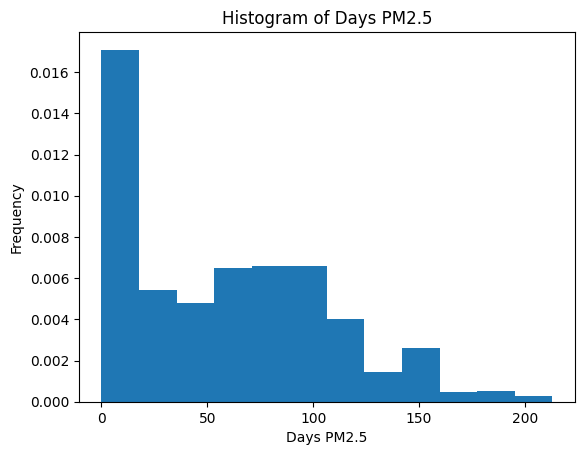

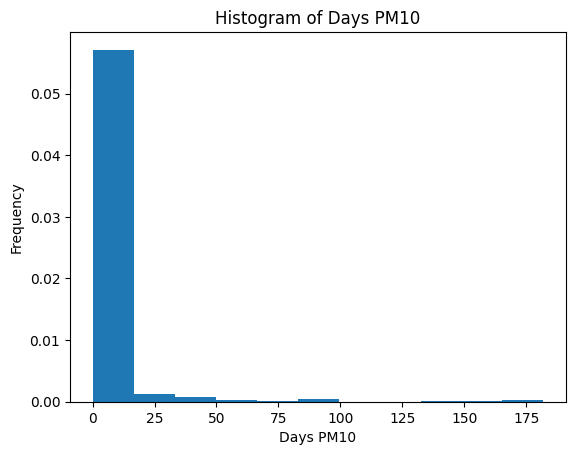

In [2]:
#Creating the histograms of each RELEVANT variable
import matplotlib.pyplot as plt
import numpy as np
num_col2 = ['Days with AQI', 'Good Days', 'Moderate Days', 'Max AQI', 
    '90th Percentile AQI', 'Median AQI', 'Days Ozone', 'Days PM2.5', 'Days PM10'] #The relevant values are selected, the other values were excluded due to the 
                                                                                 #lack of appearance and repetition. 
#Creating the histograms
for col in num_col2:
    values = data_dict[col]  #Accessing the column data from the dictionary 
    plt.hist(values, bins="auto", density="False") 
    plt.title(f'Histogram of {col}') 
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [45]:
import numpy as np
from scipy import stats 

#Preparing lists to store the results
p_correlation = []
sp_correlation = []

#Computing the correlations
for i in range(len(num_col2)):
    for j in range(i + 1, len(num_col2)):
        col1 = num_col2[i]
        col2 = num_col2[j]
        x = np.array(data_dict[col1]) # Get data for the two columns
        y = np.array(data_dict[col2])
        
        
        p_result = stats.pearsonr(x, y)#Calculate the Pearson correlations
        sp_result = stats.spearmanr(x, y) #CalculatSpearman correlations
        
        # Store results as tuples in the list
        p_correlation.append((col1, col2, p_result[0]))
        sp_correlation.append((col1, col2, sp_result[0]))

# Display Pearson Correlations
print("Pearson Correlations:")
for result in p_correlation:
    col1 = result[0]  #Accessing the first result and using it as a column
    col2 = result[1]  #Accessing the second result and using it as a column
    corr = result[2]  #Accessing the third result and using it the correlation
    print(f"{col1} vs {col2}: {corr}")

# Display Spearman Correlations
print("\nSpearman Correlations:")
for result in sp_correlation:
    col3 = result[0]  #Accessing the first result and using it as a column
    col4 = result[1]  #Accessing the second result and using it as a column
    corr2 = result[2]  #Accessing the third result and using it as the correlation
    print(f"{col3} vs {col4}: {corr2}")

Pearson Correlations:
Days with AQI vs Good Days: 0.861454812014756
Days with AQI vs Moderate Days: 0.5734492897407912
Days with AQI vs Max AQI: 0.2230391991352993
Days with AQI vs 90th Percentile AQI: 0.27330537026403073
Days with AQI vs Median AQI: 0.22119367064395426
Days with AQI vs Days Ozone: 0.5518211547827151
Days with AQI vs Days PM2.5: 0.3616775554770981
Days with AQI vs Days PM10: 0.0507280817252355
Good Days vs Moderate Days: 0.08026512737974821
Good Days vs Max AQI: 0.006987388409411709
Good Days vs 90th Percentile AQI: -0.13792898553365635
Good Days vs Median AQI: -0.1376164585792416
Good Days vs Days Ozone: 0.5913801548647825
Good Days vs Days PM2.5: 0.1474820113600595
Good Days vs Days PM10: 0.10206564542857793
Moderate Days vs Max AQI: 0.38218625369588205
Moderate Days vs 90th Percentile AQI: 0.7340937800434253
Moderate Days vs Median AQI: 0.649380227674195
Moderate Days vs Days Ozone: 0.12049088828262951
Moderate Days vs Days PM2.5: 0.4862234149139772
Moderate Days vs


Linear Regression: Days with AQI vs Good Days
Slope: 0.7107826920765151, Intercept: 9.114074394465021
R-squared: 0.7421043931433788, P-value: 3.664e-279
Standard Error: 0.013659396226792696


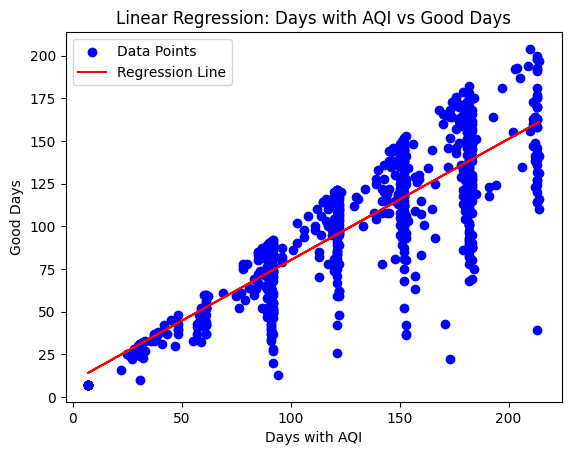


Linear Regression: Days with AQI vs Moderate Days
Slope: 0.28066950353772274, Intercept: -8.68199367238828
R-squared: 0.32884408790421804, P-value: 1.500e-83
Standard Error: 0.013071249536874701


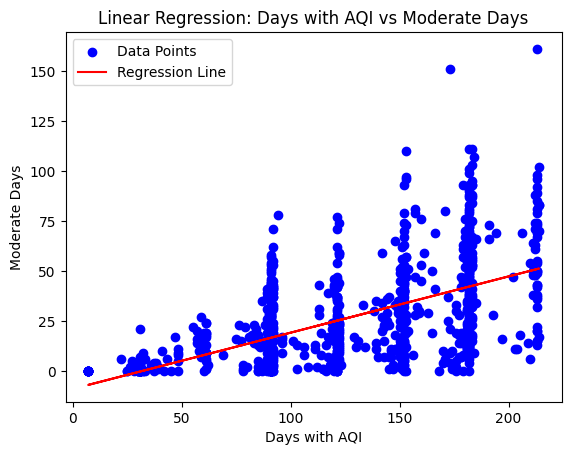


Linear Regression: Days with AQI vs Max AQI
Slope: 0.2868690828245941, Intercept: 51.8019817688694
R-squared: 0.049746484350915644, P-value: 4.283e-12
Standard Error: 0.04087214954480275


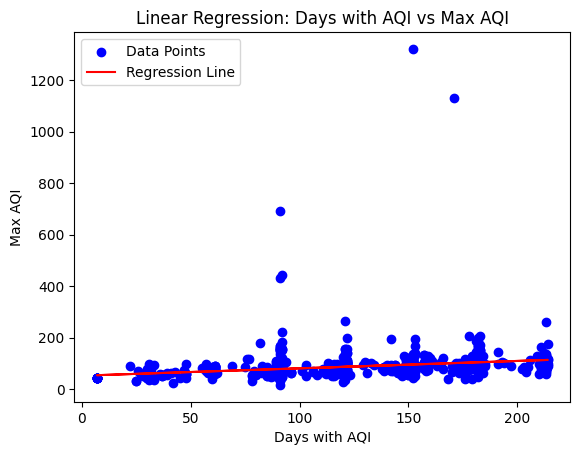


Linear Regression: Days with AQI vs 90th Percentile AQI
Slope: 0.06763755698799728, Intercept: 45.97939030223841
R-squared: 0.07469582541515885, P-value: 1.287e-17
Standard Error: 0.007760455207194794


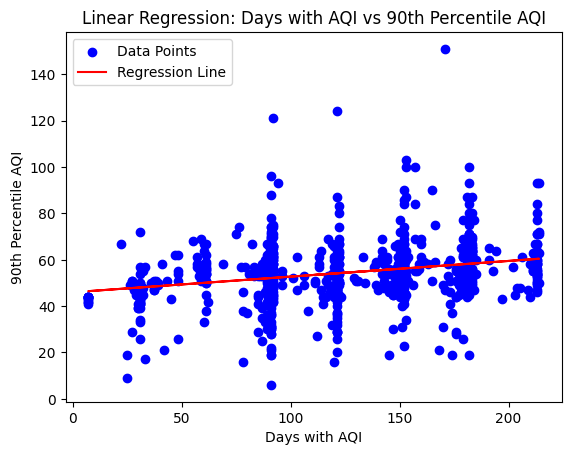


Linear Regression: Days with AQI vs Median AQI
Slope: 0.04157399170254471, Intercept: 32.41473686442286
R-squared: 0.04892663993294611, P-value: 6.478e-12
Standard Error: 0.005975320796828973


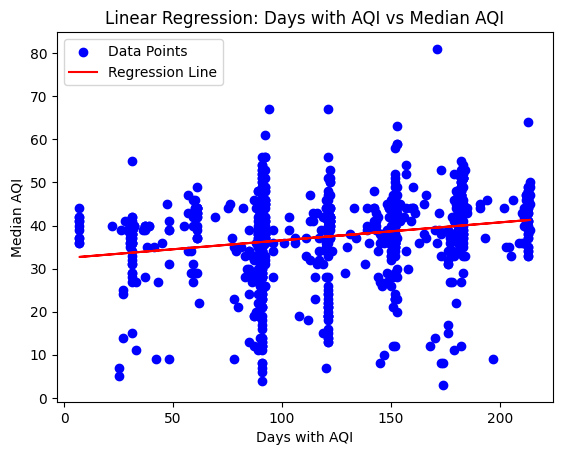


Linear Regression: Days with AQI vs Days Ozone
Slope: 0.6118934161631043, Intercept: -14.85708294227154
R-squared: 0.30450658686572896, P-value: 2.958e-76
Standard Error: 0.030145961037896754


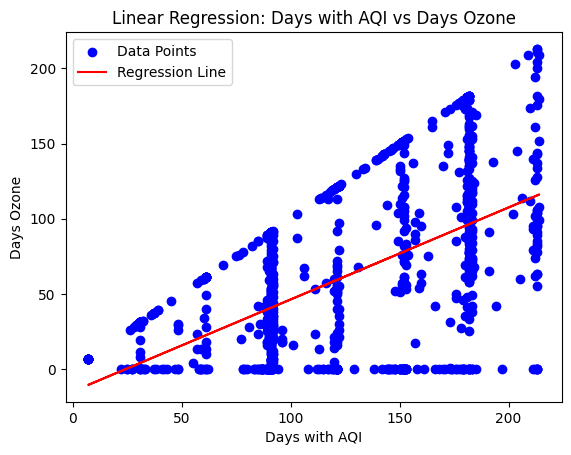


Linear Regression: Days with AQI vs Days PM2.5
Slope: 0.351184787870534, Intercept: 13.475747675564115
R-squared: 0.13081065413588955, P-value: 1.611e-30
Standard Error: 0.029510496897551603


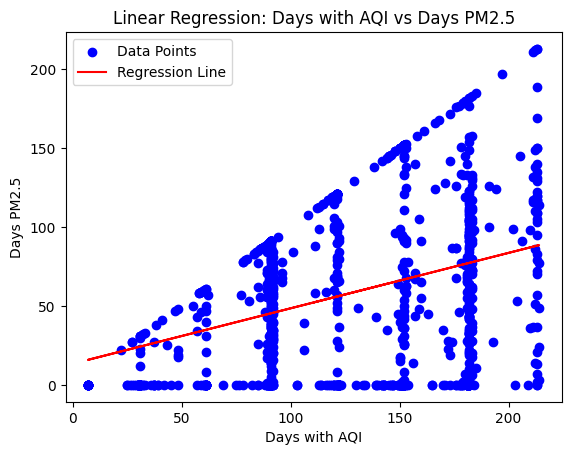


Linear Regression: Days with AQI vs Days PM10
Slope: 0.01757463554019896, Intercept: 1.6638701029735241
R-squared: 0.002573338275522194, P-value: 1.195e-01
Standard Error: 0.011279336735831954


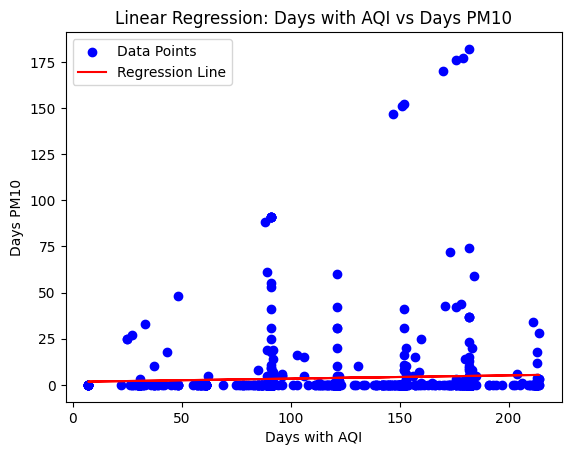


Linear Regression: Good Days vs Moderate Days
Slope: 0.04761269494333219, Intercept: 21.519428612864594
R-squared: 0.006442490673287195, P-value: 1.368e-02
Standard Error: 0.019275140745561484


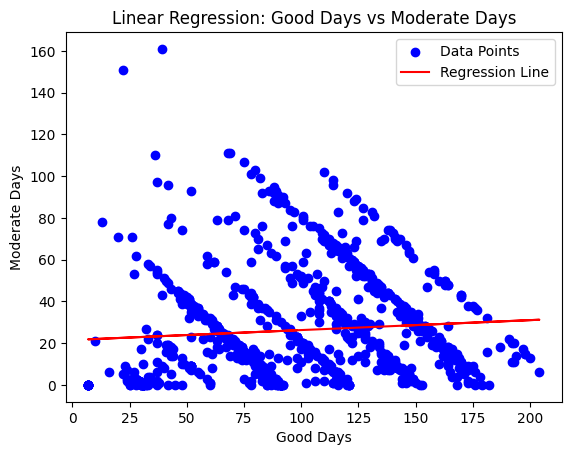


Linear Regression: Good Days vs Max AQI
Slope: 0.010892136877934675, Intercept: 86.34703533883551
R-squared: 4.882359678398056e-05, P-value: 8.303e-01
Standard Error: 0.05081510078894935


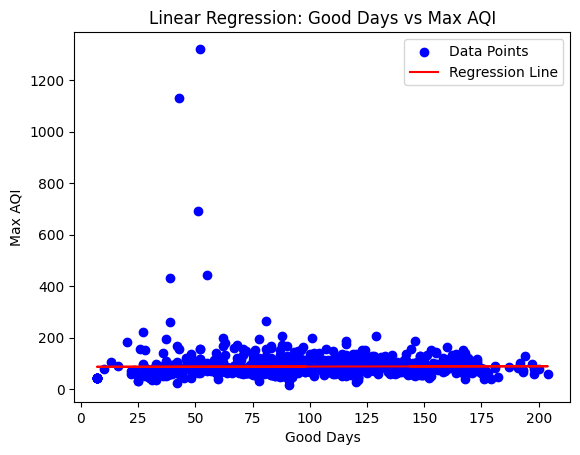


Linear Regression: Good Days vs 90th Percentile AQI
Slope: -0.04137051686230747, Intercept: 58.40109677701352
R-squared: 0.01902440505034362, P-value: 2.135e-05
Standard Error: 0.009684332557254208


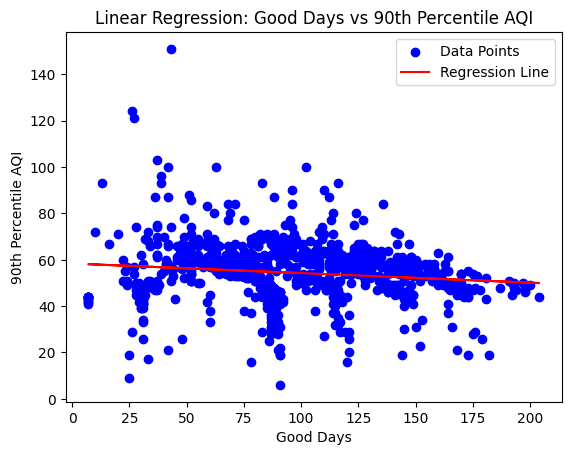


Linear Regression: Good Days vs Median AQI
Slope: -0.0313483772299191, Intercept: 40.62602561232805
R-squared: 0.018938289671892112, P-value: 2.230e-05
Standard Error: 0.0073552601496942255


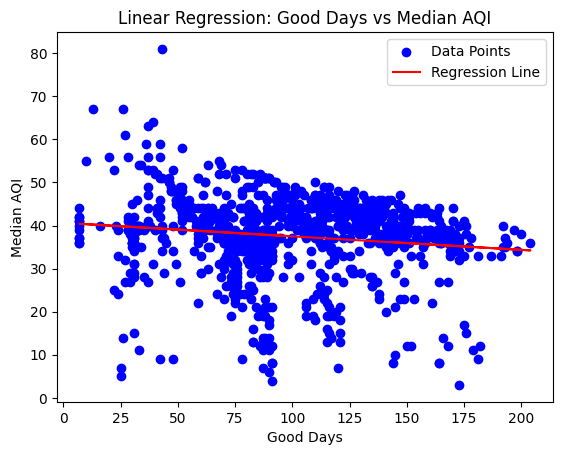


Linear Regression: Good Days vs Days Ozone
Slope: 0.794767022648464, Intercept: -16.26880799661921
R-squared: 0.3497304875678933, P-value: 5.044e-90
Standard Error: 0.035328481967333625


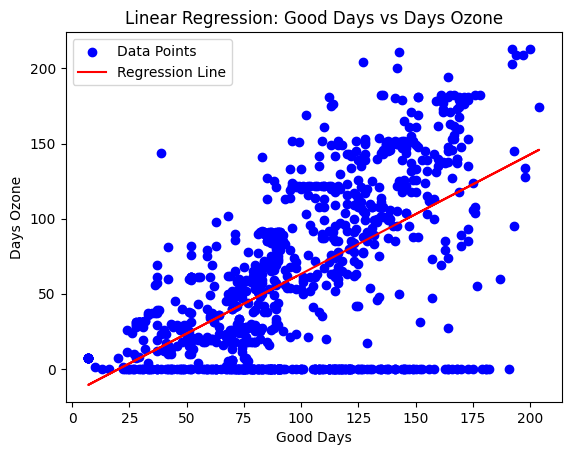


Linear Regression: Good Days vs Days PM2.5
Slope: 0.17355968209369516, Intercept: 40.17036163239459
R-squared: 0.021750943674808745, P-value: 5.421e-06
Standard Error: 0.03794370203177277


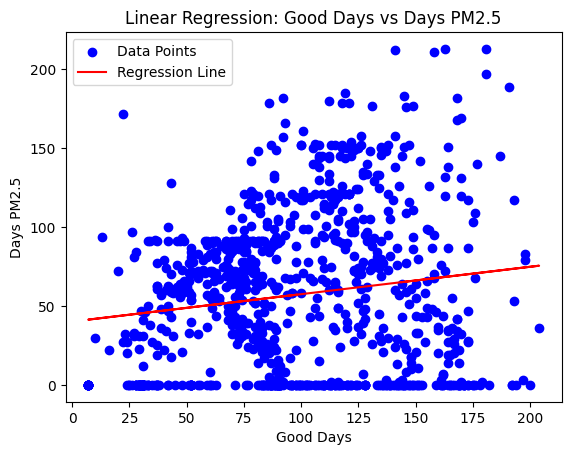


Linear Regression: Good Days vs Days PM10
Slope: 0.042856147802583976, Intercept: -0.326187043698805
R-squared: 0.010417395976752184, P-value: 1.699e-03
Standard Error: 0.013616477077812219


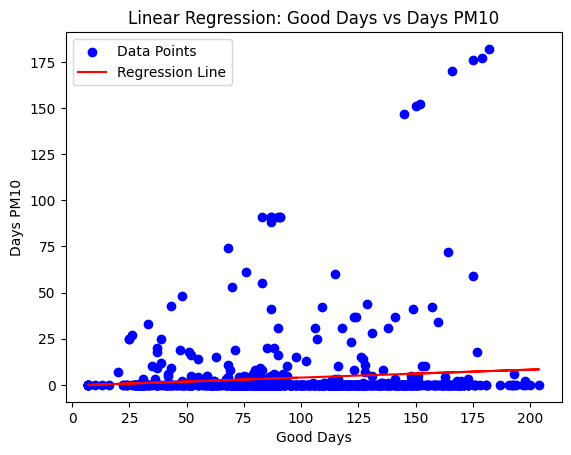


Linear Regression: Moderate Days vs Max AQI
Slope: 1.004332237536539, Intercept: 61.140142126867794
R-squared: 0.14606633251409298, P-value: 3.674e-34
Standard Error: 0.07916251752400007


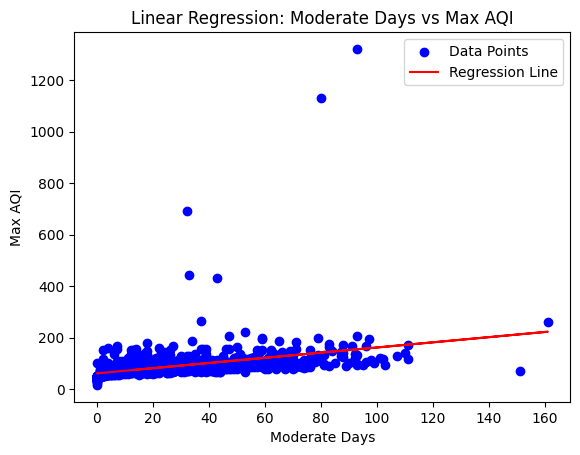


Linear Regression: Moderate Days vs 90th Percentile AQI
Slope: 0.3711855700437534, Intercept: 44.66643720679842
R-squared: 0.5388936778984442, P-value: 2.330e-160
Standard Error: 0.011192968122141926


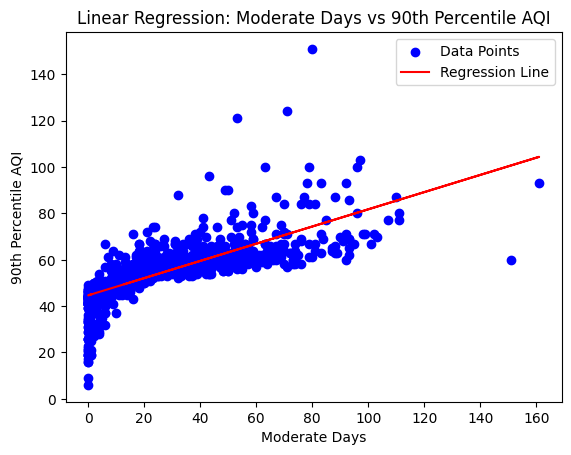


Linear Regression: Moderate Days vs Median AQI
Slope: 0.24937211184730237, Intercept: 31.052741893435822
R-squared: 0.42169468009418964, P-value: 4.976e-114
Standard Error: 0.009519904771328315


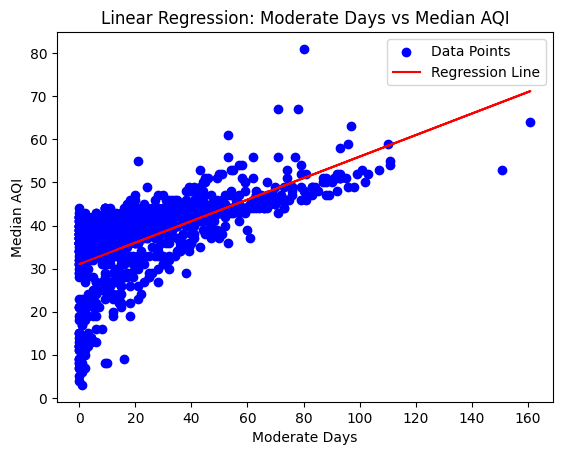


Linear Regression: Moderate Days vs Days Ozone
Slope: 0.2729803796494508, Intercept: 53.94961282789565
R-squared: 0.014518054159137091, P-value: 2.083e-04
Standard Error: 0.07331734872837815


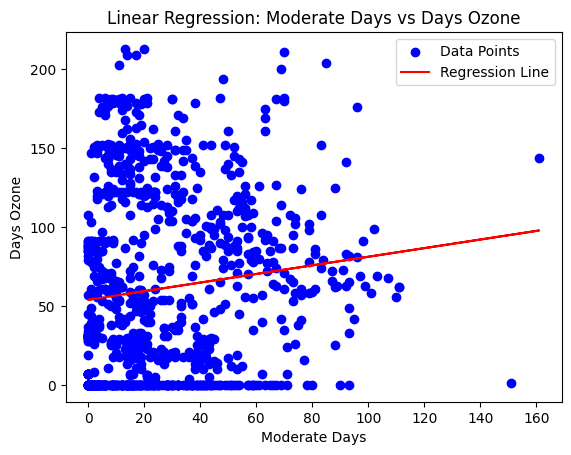


Linear Regression: Moderate Days vs Days PM2.5
Slope: 0.964605644028537, Intercept: 31.83555779567783
R-squared: 0.23641320921060988, P-value: 4.089e-57
Standard Error: 0.05651299463725713


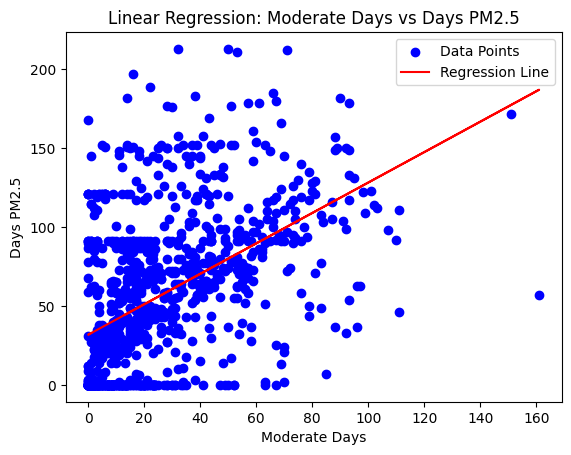


Linear Regression: Moderate Days vs Days PM10
Slope: -0.053683417335952485, Intercept: 5.249198432403601
R-squared: 0.0057518155070084434, P-value: 1.985e-02
Standard Error: 0.023008604127492872


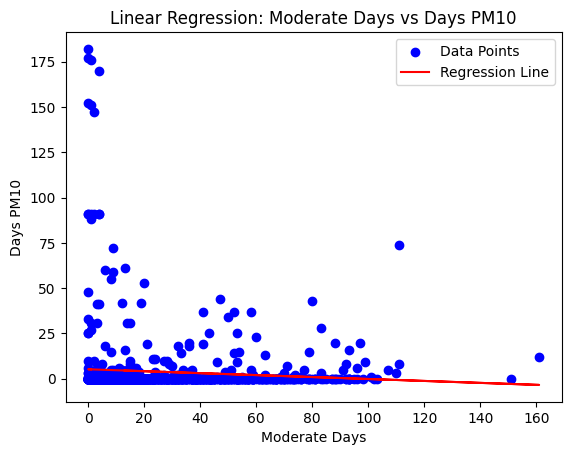


Linear Regression: Max AQI vs 90th Percentile AQI
Slope: 0.0978761359180291, Intercept: 45.819257154778846
R-squared: 0.25874932858943633, P-value: 3.356e-63
Standard Error: 0.005400387679129638


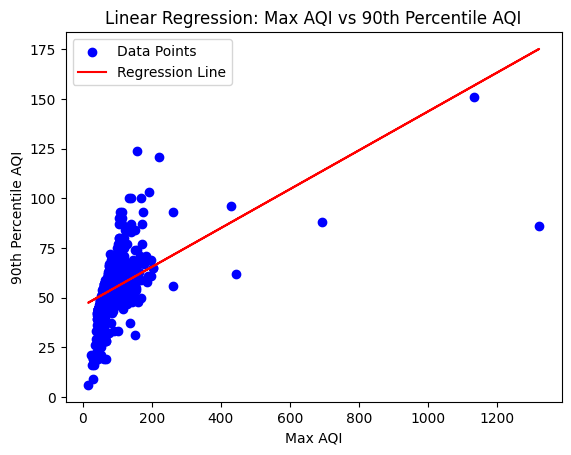


Linear Regression: Max AQI vs Median AQI
Slope: 0.053795543850410084, Intercept: 32.87264294605509
R-squared: 0.13551882947880525, P-value: 1.229e-31
Standard Error: 0.004429242300370843


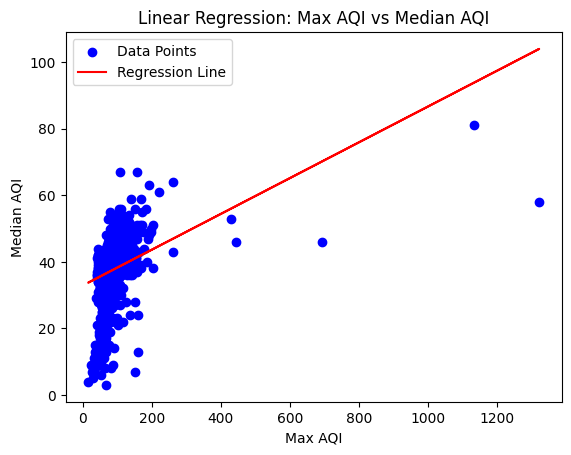


Linear Regression: Max AQI vs Days Ozone
Slope: 0.09099003906062976, Intercept: 53.13589186683732
R-squared: 0.011138787775034128, P-value: 1.171e-03
Standard Error: 0.02794780768264012


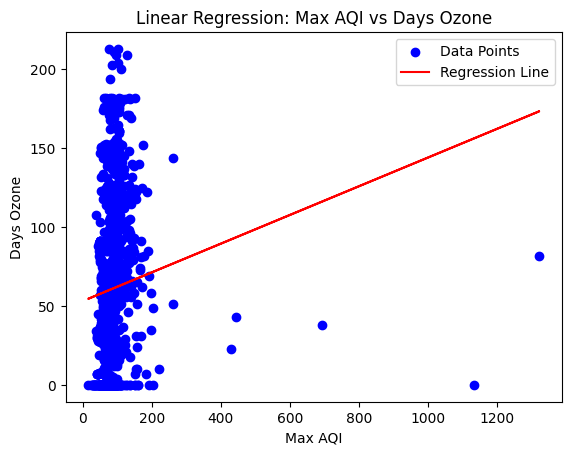


Linear Regression: Max AQI vs Days PM2.5
Slope: 0.07346235590091672, Intercept: 50.642487078331854
R-squared: 0.009469052531632712, P-value: 2.778e-03
Standard Error: 0.024493497378846676


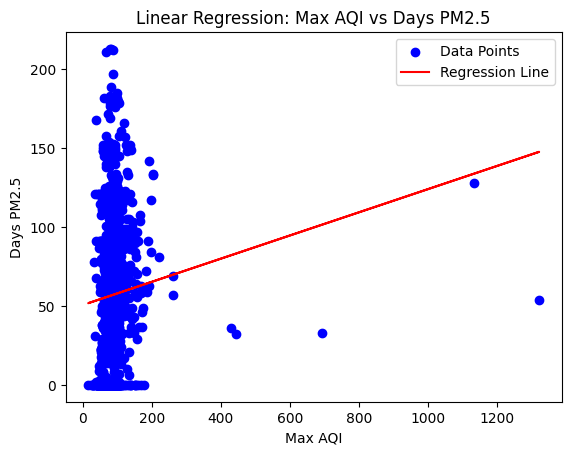


Linear Regression: Max AQI vs Days PM10
Slope: 0.0128162623497943, Intercept: 2.7249412256820835
R-squared: 0.0022638732000860567, P-value: 1.443e-01
Standard Error: 0.008770985173917063


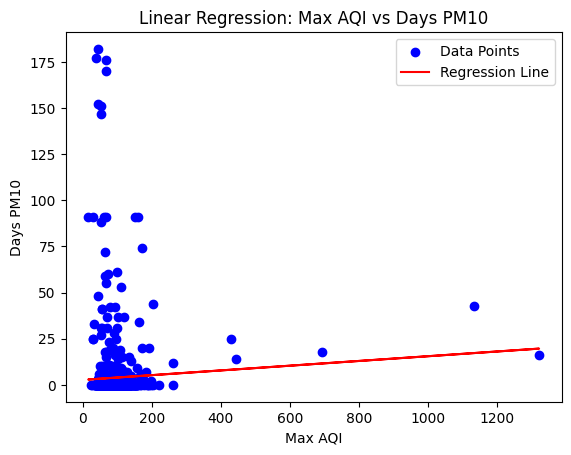


Linear Regression: 90th Percentile AQI vs Median AQI
Slope: 0.6041018850113293, Intercept: 4.727121787957678
R-squared: 0.6327058034452206, P-value: 7.133e-207
Standard Error: 0.015004499152204382


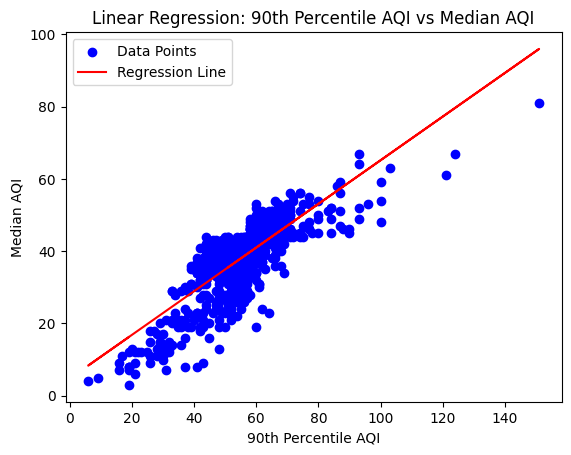


Linear Regression: 90th Percentile AQI vs Days Ozone
Slope: 0.6608870282782394, Intercept: 25.153783271509305
R-squared: 0.02175600155767081, P-value: 5.407e-06
Standard Error: 0.1444662738851025


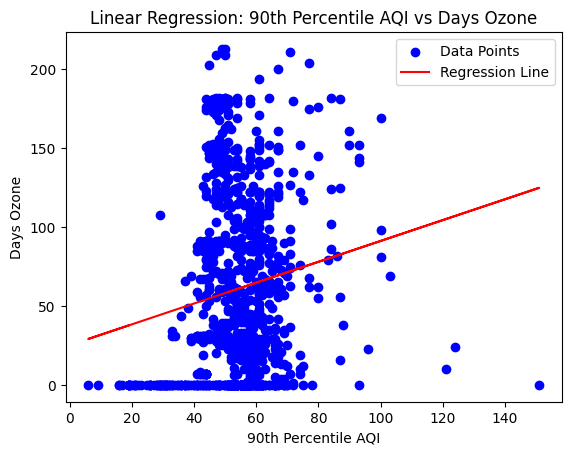


Linear Regression: 90th Percentile AQI vs Days PM2.5
Slope: 0.8281284013930151, Intercept: 12.034693763068027
R-squared: 0.04454988427645247, P-value: 5.876e-11
Standard Error: 0.12502117787700603


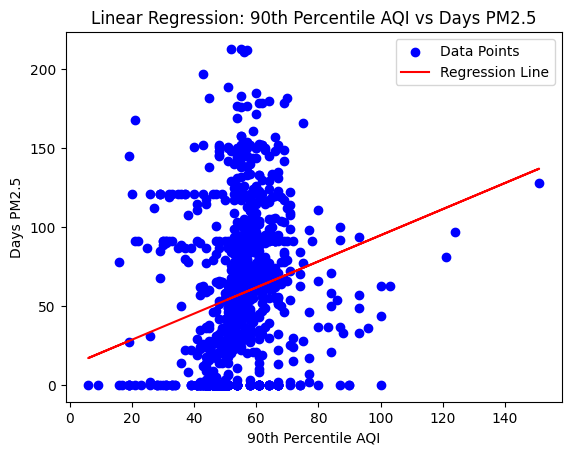


Linear Regression: 90th Percentile AQI vs Days PM10
Slope: -0.27717563278030954, Intercept: 18.916416299904952
R-squared: 0.03920250465943966, P-value: 8.630e-10
Standard Error: 0.04473209716038981


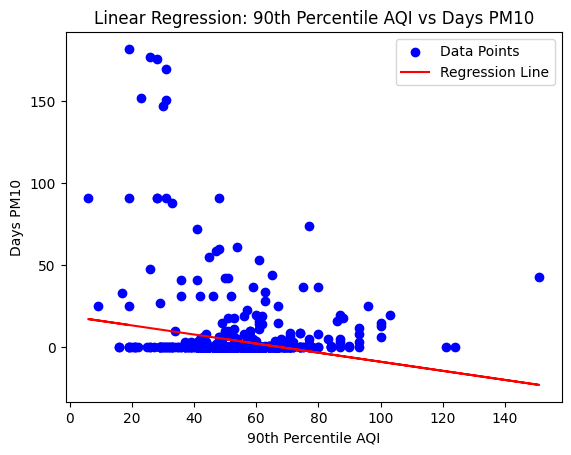


Linear Regression: Median AQI vs Days Ozone
Slope: 2.0787829881977644, Intercept: -17.020697370955865
R-squared: 0.12415422340872781, P-value: 5.985e-29
Standard Error: 0.17998960073172987


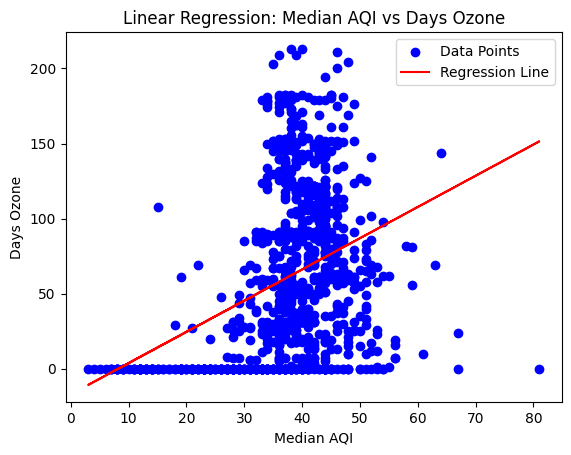


Linear Regression: Median AQI vs Days PM2.5
Slope: -0.08708931238111256, Intercept: 60.33598685641566
R-squared: 0.00028418392506879975, P-value: 6.051e-01
Standard Error: 0.16838700682261043


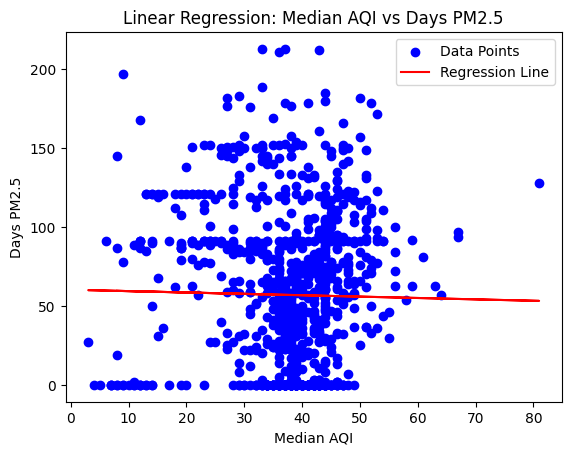


Linear Regression: Median AQI vs Days PM10
Slope: -0.5987175432340935, Intercept: 26.341843806377135
R-squared: 0.10550335029091244, P-value: 1.310e-24
Standard Error: 0.05683075237756259


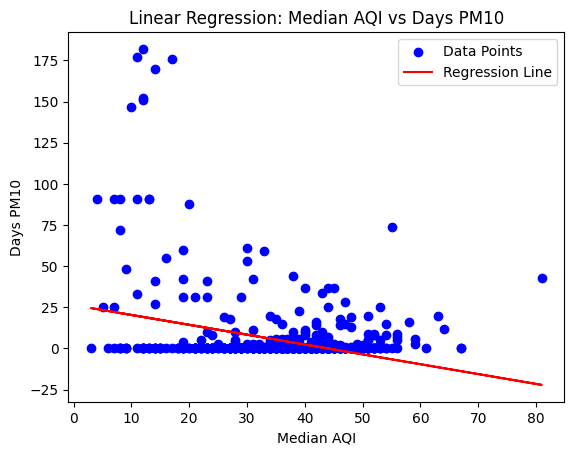


Linear Regression: Days Ozone vs Days PM2.5
Slope: -0.4398183499342308, Intercept: 83.93172394979982
R-squared: 0.25227446009844584, P-value: 2.034e-61
Standard Error: 0.024683855646886188


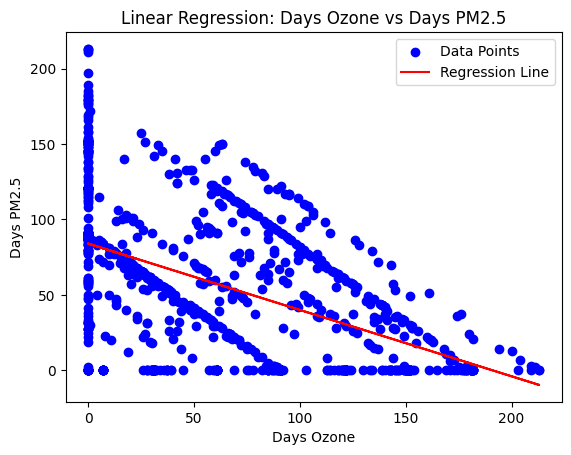


Linear Regression: Days Ozone vs Days PM10
Slope: -0.045791219462204366, Intercept: 6.642518324028851
R-squared: 0.021480456795141774, P-value: 6.209e-06
Standard Error: 0.01007512384468759


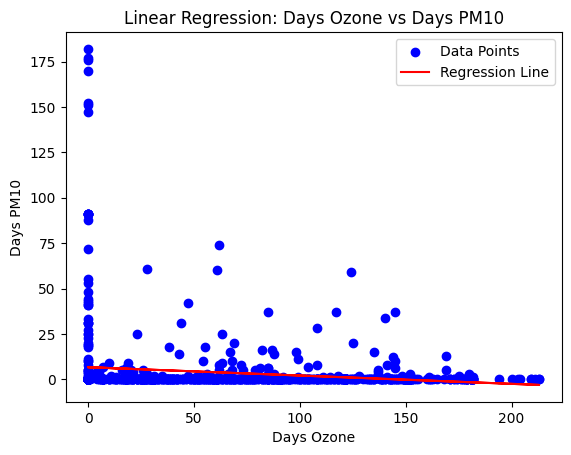


Linear Regression: Days PM2.5 vs Days PM10
Slope: -0.04970604192688377, Intercept: 6.68158199589347
R-squared: 0.019407556624251563, P-value: 1.761e-05
Standard Error: 0.011517897523007399


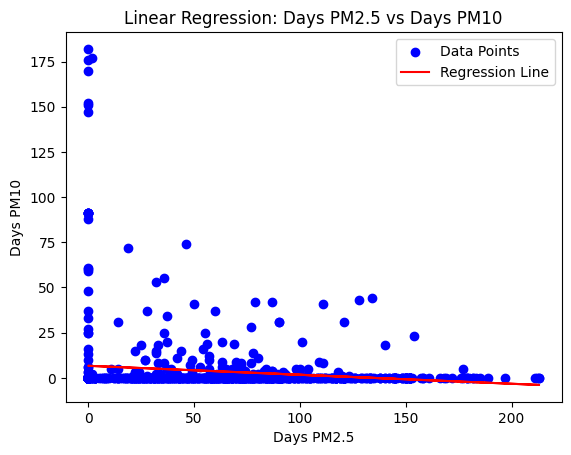

In [54]:
#Linear Regression
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

#Performing linear regression  
for i in range(len(num_col2)):
    for j in range(i + 1, len(num_col2)):  #Using double for loop to avoid choosing wrong values
        col5 = num_col2[i]
        col6 = num_col2[j]
        x = np.array(data_dict[col5]) #Extracting the data from the two columns
        y = np.array(data_dict[col6])
        
        regression = linregress(x, y) #Performing the linear regression using the linregress function 
        
        slope = regression.slope #Extracting the slope, intercept, r-value, and p-value
        intercept = regression.intercept
        r_value = regression.rvalue
        p_value = regression.pvalue
        std_err = regression.stderr
        
        print(f"\nLinear Regression: {col5} vs {col6}") #Printing the regression results
        print(f"Slope: {slope}, Intercept: {intercept}")
        print(f"R-squared: {r_value**2}, P-value: {p_value:.3e}")
        print(f"Standard Error: {std_err}")
        
        fig, ax = plt.subplots() # Creating the scatter plot with the regression line
        ax.scatter(x, y, color = "b", label = "Data Points")
        ax.plot(x, slope * x + intercept, color='r', label='Regression Line')
        ax.set_title(f'Linear Regression: {col5} vs {col6}')
        ax.set_xlabel(col5)
        ax.set_ylabel(col6)
        ax.legend()
        plt.show()

Explained Variance Ratios: [0.39908075 0.28554305 0.22637291 0.05140399]


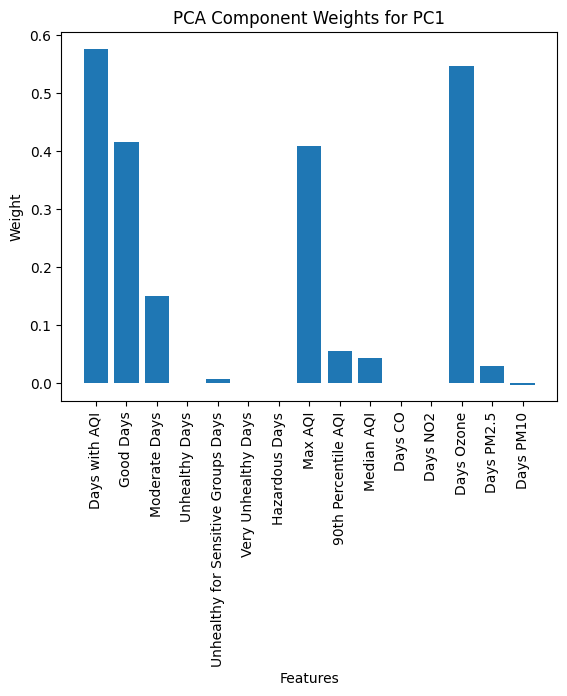

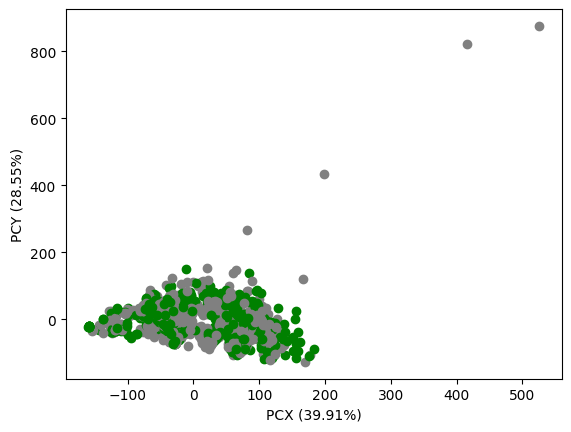

In [53]:
#Dimensionality Reduction and PCA 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#List of all the quantitative variables, for this we are using all data available since ask for all the quantitive variables
num_columns = ['Days with AQI', 'Good Days', 'Moderate Days', 'Unhealthy Days', 
    'Unhealthy for Sensitive Groups Days', 'Very Unhealthy Days', 'Hazardous Days', 
    'Max AQI', '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2', 'Days Ozone',
        'Days PM2.5', 'Days PM10']
rango = range(len(data_dict[num_columns[0]]))
#Preparing the dataset as a list of lists
LoL = []
for ii in rango:  #Checking the rows 
    row = []
    for col in num_columns:  #Checking the columns
        row.append(data_dict[col][ii])
    LoL.append(row)

#Performing the PCA for 4 components
pca = PCA(n_components=4)
principal_components = pca.fit_transform(LoL)
#print(principal_components)

exp_variance = pca.explained_variance_ratio_ #Extracting the Explained Variance Ratio
print("Explained Variance Ratios:", exp_variance)#Printing the Explained Variance Ratio

#Plotting the Bar Chart for PCA Component Weights
comp_w = pca.components_

#Visualizing the first principal component weight
fig, ax = plt.subplots()
ax.bar(num_columns, comp_w[0])
ax.set_title("PCA Component Weights for PC1")
ax.set_xlabel("Features")
ax.set_ylabel("Weight")
plt.xticks(rotation=90)
plt.show()

#Visualizing the data on PC1 and PC2
pc1 = []
pc2 = []
for row in principal_components:
    pc1.append(row[0])  #Adding the first principal component to a list
    pc2.append(row[1])  #Adding the second principal component to a list

# GENERATE PLOT
fig, ax = plt.subplots()  #Creating the figure 

PCX = 0  # Index for Principal Component X
PCY = 1  # Index for Principal Component Y

#Assigning ranges for each state manually, the data is divided into states
#We are considering states with more than 6 million people as urban, anything less is rural.
#Urban = grey;  Rural = green 
ax.scatter(principal_components[:14, PCX], principal_components[:14, PCY], c="grey", label="Category 1") #1
ax.scatter(principal_components[15:19, PCX], principal_components[15:19, PCY], c="green", label="Category 2") #2
ax.scatter(principal_components[20:32, PCX], principal_components[20:32, PCY], c="grey", label="Category 1") #3
ax.scatter(principal_components[33:43, PCX], principal_components[33:43, PCY], c="green", label="Category 2") #4
ax.scatter(principal_components[44:90, PCX], principal_components[44:90, PCY], c="grey", label="Category 1") #5
ax.scatter(principal_components[91:116, PCX], principal_components[91:116, PCY], c="green", label="Category 2") #6
ax.scatter(principal_components[117:124, PCX], principal_components[117:124, PCY], c="green", label="Category 2") #7
ax.scatter(principal_components[126:128, PCX], principal_components[126:128, PCY], c="green", label="Category 2") #8
ax.scatter(principal_components[130:167, PCX], principal_components[130:167, PCY], c="grey", label="Category 1") #9
ax.scatter(principal_components[168:195, PCX], principal_components[168:195, PCY], c="grey", label="Category 1") #10
ax.scatter(principal_components[196:198, PCX], principal_components[196:198, PCY], c="green", label="Category 2")#11
ax.scatter(principal_components[199:216, PCX], principal_components[199:216, PCY], c="green", label="Category 2") #12
ax.scatter(principal_components[217:239, PCX], principal_components[217:239, PCY], c="grey", label="Category 1")#13
ax.scatter(principal_components[240:272, PCX], principal_components[240:272, PCY], c="grey", label="Category 1")#14
ax.scatter(principal_components[273:286, PCX], principal_components[273:286, PCY], c="green", label="Category 2")#15
ax.scatter(principal_components[287:296, PCX], principal_components[287:296, PCY], c="green", label="Category 2")#16
ax.scatter(principal_components[297:320, PCX], principal_components[297:320, PCY], c="green", label="Category 2")#17
ax.scatter(principal_components[321:342, PCX], principal_components[321:342, PCY], c="green", label="Category 2")#18
ax.scatter(principal_components[343:353, PCX], principal_components[343:353, PCY], c="green", label="Category 2")#19
ax.scatter(principal_components[354:369, PCX], principal_components[354:369, PCY], c="grey", label="Category 1")#20
ax.scatter(principal_components[370:382, PCX], principal_components[370:382, PCY], c="grey", label="Category 1")#21
ax.scatter(principal_components[383:407, PCX], principal_components[383:407, PCY], c="grey", label="Category 1")#22
ax.scatter(principal_components[408:437, PCX], principal_components[408:437, PCY], c="green", label="Category 2")#23
ax.scatter(principal_components[438:456, PCX], principal_components[438:456, PCY], c="green", label="Category 2")#24
ax.scatter(principal_components[457:475, PCX], principal_components[457:475, PCY], c="grey", label="Category 1")#25
ax.scatter(principal_components[476:484, PCX], principal_components[476:484, PCY], c="green", label="Category 2")#26
ax.scatter(principal_components[485:493, PCX], principal_components[485:493, PCY], c="green", label="Category 2")#27
ax.scatter(principal_components[494:500, PCX], principal_components[494:500, PCY], c="green", label="Category 2")#28
ax.scatter(principal_components[501:515, PCX], principal_components[501:515, PCY], c="green", label="Category 2")#29
ax.scatter(principal_components[516:526, PCX], principal_components[516:526, PCY], c="grey", label="Category 1")#30
ax.scatter(principal_components[527:552, PCX], principal_components[527:552, PCY], c="green", label="Category 2")#31
ax.scatter(principal_components[553:586, PCX], principal_components[553:586, PCY], c="grey", label="Category 1")#32
ax.scatter(principal_components[587:595, PCX], principal_components[587:595, PCY], c="grey", label="Category 1")#33
ax.scatter(principal_components[596:632, PCX], principal_components[596:632, PCY], c="green", label="Category 2")#34
ax.scatter(principal_components[633:652, PCX], principal_components[633:652, PCY], c="grey", label="Category 1")#35
ax.scatter(principal_components[653:673, PCX], principal_components[653:673, PCY], c="green", label="Category 2")#36
ax.scatter(principal_components[674:707, PCX], principal_components[674:707, PCY], c="green", label="Category 2")#37
ax.scatter(principal_components[708:715, PCX], principal_components[708:715, PCY], c="grey", label="Category 1")#38
ax.scatter(principal_components[716:718, PCX], principal_components[716:718, PCY], c="green", label="Category 2")#39
ax.scatter(principal_components[719:731, PCX], principal_components[719:731, PCY], c="green", label="Category 2")#40
ax.scatter(principal_components[732:741, PCX], principal_components[732:741, PCY], c="green", label="Category 2")#41
ax.scatter(principal_components[742:764, PCX], principal_components[742:764, PCY], c="grey", label="Category 1")#42
ax.scatter(principal_components[765:808, PCX], principal_components[765:808, PCY], c="grey", label="Category 1")#43
ax.scatter(principal_components[809:822, PCX], principal_components[809:822, PCY], c="green", label="Category 2")#44
ax.scatter(principal_components[823:825, PCX], principal_components[823:825, PCY], c="green", label="Category 2")#45
ax.scatter(principal_components[826:855, PCX], principal_components[826:855, PCY], c="grey", label="Category 1")#46
ax.scatter(principal_components[856:885, PCX], principal_components[856:885, PCY], c="grey", label="Category 1")#47
ax.scatter(principal_components[886:898, PCX], principal_components[886:898, PCY], c="green", label="Category 2")#48
ax.scatter(principal_components[899:926, PCX], principal_components[899:926, PCY], c="green", label="Category 2")#49
ax.scatter(principal_components[927:943, PCX], principal_components[927:943, PCY], c="green", label="Category 2")#50
### Set Axis Labels ###
label_X = "PCX (" + str(np.round(pca.explained_variance_ratio_[PCX] * 100, decimals=2)) + "%)"
label_Y = "PCY (" + str(np.round(pca.explained_variance_ratio_[PCY] * 100, decimals=2)) + "%)"
ax.set_xlabel(label_X)
ax.set_ylabel(label_Y)
plt.show()
